## 1. Importing, Understanding, and Inspecting Data 

In [1]:
# importing the neccesary libraries
# for data manipulation and exploration
import pandas as pd 

# for data visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import numpy as np

matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

# for logistic regression
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# for confussion matrix
from sklearn.metrics import confusion_matrix

In [2]:
# Loading the data -- Renamed the file data.xlsx 
cardio_factors = pd.read_excel('factors cardiovascular desease data.xlsx')

In [3]:
# Lets find the shape of the data
cardio_factors.shape

(303, 14)

In [4]:
# Once the data has been loaded in cardio_factors, let's explore it:
cardio_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Lets take a look of the first 10 observations of the dataframe:
cardio_factors.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
# Lets check the last 10 rows of the data frame
cardio_factors.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Observations:
- We have 14 variables
- Most of the attributes are int64, and only oldpeak is float64
- We have a total of 303 observations in our dataset
- The name of the variables, are quiet difficult to understand what it means. We need to rename some of them
- It seems the dataframe contains accurate values (we need to check them later, like 'thal' values)
- To understand better what each variable means, here is the data dictionary:

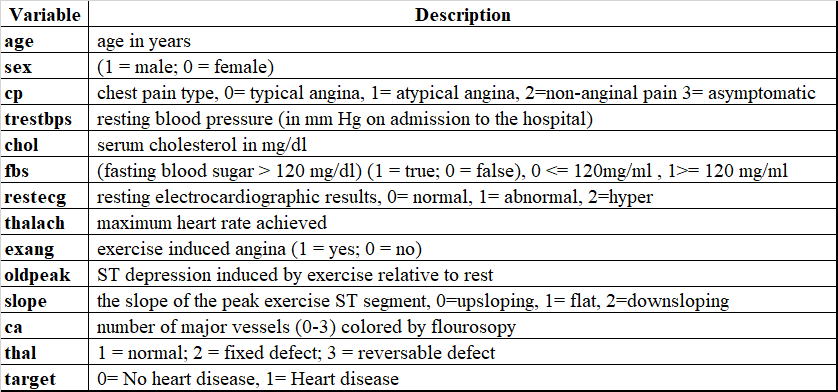

### Data Cleaning

In [7]:
# Check for null values in the data
cardio_factors.isnull().values.any()

False

In [8]:
# So, there is none null values. Lets get a broad view of the variables
cardio_factors.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Lets check for duplicates
cardio_factors.duplicated().sum()

1

In [10]:
# Drop duplicates rows (1)
cardio_factors = cardio_factors.drop_duplicates()

In [11]:
# Lets check it again
cardio_factors.duplicated().sum()

0

In [12]:
# Renaming the columns for better understanding of the data
cardio_factors.rename(columns ={'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure', 'chol': 'serum_cholesterol',
                     'fbs': 'fasting_blood_sugar', 'restecg':'resting_electro', 'thalach':'max_heart_rate',
                     'exang': 'exercise_induced_angina', 'oldpeak': 'st_depression_induced', 
                     'ca': 'number_vessels', 'thal': 'thalassemia'}, inplace= True)

In [13]:
# Lets check the dataframe
cardio_factors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    int64  
 2   chest_pain_type          302 non-null    int64  
 3   resting_blood_pressure   302 non-null    int64  
 4   serum_cholesterol        302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    int64  
 6   resting_electro          302 non-null    int64  
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    int64  
 9   st_depression_induced    302 non-null    float64
 10  slope                    302 non-null    int64  
 11  number_vessels           302 non-null    int64  
 12  thalassemia              302 non-null    int64  
 13  target                   302 non-null    int64  
dtypes: float64(1), int64(13)
m

In [14]:
cardio_factors.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'resting_electro',
       'max_heart_rate', 'exercise_induced_angina', 'st_depression_induced',
       'slope', 'number_vessels', 'thalassemia', 'target'],
      dtype='object')

## Preliminary Statistical Summary
## Exploring the measures of central tendencies and the spread of the data overall.

In [15]:
cardio_factors.describe().round()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electro,max_heart_rate,exercise_induced_angina,st_depression_induced,slope,number_vessels,thalassemia,target
count,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,133.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [16]:
cardio_factors.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

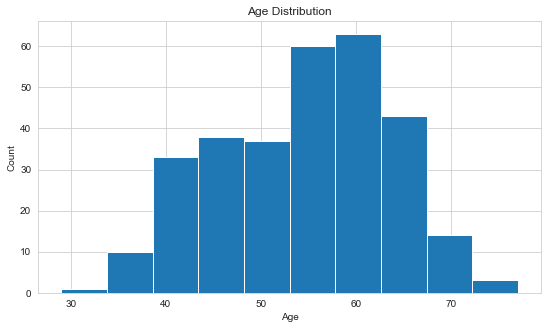

In [17]:
# Lets take a look at the Age Distribution
plt.hist(cardio_factors['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

[Text(0.5, 1.0, 'Distribution of Ages of Female=0 and Male=1')]

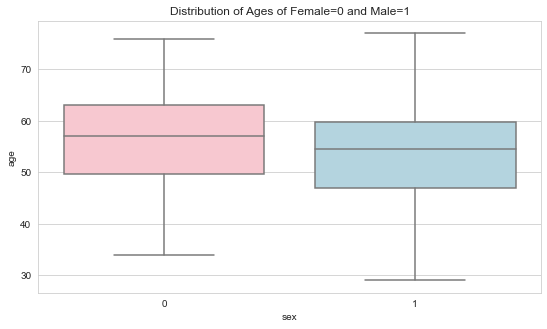

In [18]:
# Lets check with a box plot the distribution of ages of male and female 
sns.boxplot(data = cardio_factors, x = 'sex', y = 'age',
            palette =['pink','lightblue']).set(title="Distribution of Ages of Female=0 and Male=1")

In [19]:
# Target variable: 0= No heart disease, 1= Heart disease
cardio_factors.target.value_counts()

1    164
0    138
Name: target, dtype: int64

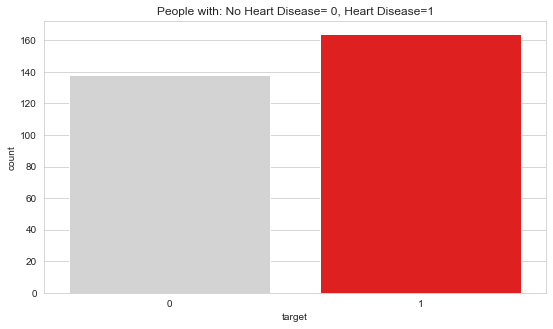

In [20]:
# Lets visualize our target variable
target_countplot = sns.countplot(x='target', data = cardio_factors,
                                 palette=['lightgrey','red']).set(title = "People with: No Heart Disease= 0, Heart Disease=1")
               
plt.show()

In [21]:
# Lets see a statistical summary only of the numeric variables
num_variables = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'st_depression_induced',
                'number_vessels']
cardio_factors[num_variables].describe()

,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,st_depression_induced,number_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


Observations:
- Our population age is between 29 years old and 77 years old with a mean of 54 years old
- 206 males and 96 females
- 164 people have heart disease and 138 people have no heart disease
- There are some variables that are categorical and they need to be explore 

##  Performing EDA and Modeling:

### a) Identify the data variables which might be categorical in nature. 


In [22]:
# Lets check the values of the variables
print(cardio_factors.apply(lambda col: col.unique()))

age                        [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5...
sex                                                                   [1, 0]
chest_pain_type                                                 [3, 2, 1, 0]
resting_blood_pressure     [145, 130, 120, 140, 172, 150, 110, 135, 160, ...
serum_cholesterol          [233, 250, 204, 236, 354, 192, 294, 263, 199, ...
fasting_blood_sugar                                                   [1, 0]
resting_electro                                                    [0, 1, 2]
max_heart_rate             [150, 187, 172, 178, 163, 148, 153, 173, 162, ...
exercise_induced_angina                                               [0, 1]
st_depression_induced      [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ...
slope                                                              [0, 2, 1]
number_vessels                                               [0, 2, 1, 3, 4]
thalassemia                                                     [1, 2, 3, 0]

 Categorical Variables:
 
        - sex
        
        - chest_pain_type
        
        - fasting_blood_sugar
        
        - resting_electro
        
        - exercise_induced_angina
        
        - slope
               
        - thalassemia

In [23]:
# Lets check the variable thalassemia which has values out of range -> 0
cardio_factors.thalassemia.value_counts()

2    165
3    117
1     18
0      2
Name: thalassemia, dtype: int64

### Observations:
- chest_pain_type has values ranging from 0 to 3
- resting_electro has values ranging from 0 to 2
- slope has values ranging from 0 to 2
- thalessemia has value ranging from 0 to 3, and in the description it goes from  1 to 3. It has only 2 records with values 0, maybe this could be missing values. This 2 records need to be imputed

In [24]:
# Letscalculate the mode of the variable thalassemia for further imputation of the value=0
cardio_factors.thalassemia.mode()

0    2
dtype: int64

In [25]:
# Lets impute those who thalessemia=0 whith the mode=2
cardio_factors.loc[cardio_factors.thalassemia == 0,  'thalassemia'] = 2

In [26]:
# lets check the values of the variable thalassemia 
cardio_factors.thalassemia.unique()

array([1, 2, 3], dtype=int64)

In [27]:
# Lets add more meaning to the categorical variables
# Variable sex
cardio_factors.loc[cardio_factors.sex == 0, 'sex'] = 'female'
cardio_factors.loc[cardio_factors.sex == 1, 'sex'] = 'male'

In [28]:
# Variable chest_pain_type
cardio_factors.loc[cardio_factors.chest_pain_type == 0, 'chest_pain_type'] = 'typical angina'
cardio_factors.loc[cardio_factors.chest_pain_type == 1, 'chest_pain_type'] = 'atypical angina'
cardio_factors.loc[cardio_factors.chest_pain_type == 2, 'chest_pain_type'] = 'non-anginal pain'
cardio_factors.loc[cardio_factors.chest_pain_type == 3, 'chest_pain_type'] = 'asymptomatic'

In [29]:
# Variable fasting_blood sugar
cardio_factors.loc[cardio_factors.fasting_blood_sugar == 0, 'fasting_blood_sugar'] = '< 120mg/ml'
cardio_factors.loc[cardio_factors.fasting_blood_sugar == 1, 'fasting_blood_sugar'] = '> 120mg/ml'

In [30]:
# Variable resting_electro
cardio_factors.loc[cardio_factors.resting_electro == 0, 'resting_electro'] = 'normal'
cardio_factors.loc[cardio_factors.resting_electro == 1, 'resting_electro'] = 'abnormal'
cardio_factors.loc[cardio_factors.resting_electro == 2, 'resting_electro'] = 'hyper'

In [31]:
# Variable slope
cardio_factors.loc[cardio_factors.slope == 0, 'slope'] = 'upsloping'
cardio_factors.loc[cardio_factors.slope == 1, 'slope'] = 'flat'
cardio_factors.loc[cardio_factors.slope == 2, 'slope'] = 'downsloping'

In [32]:
# Variable thalassemia
cardio_factors.loc[cardio_factors.thalassemia == 1, 'thalassemia'] = 'normal'
cardio_factors.loc[cardio_factors.thalassemia == 2, 'thalassemia'] = 'fixed defect'
cardio_factors.loc[cardio_factors.thalassemia == 3, 'thalassemia'] = 'reversable defect'

### Describe and explore these variables using appropriate tools

### Univariate Analysis:

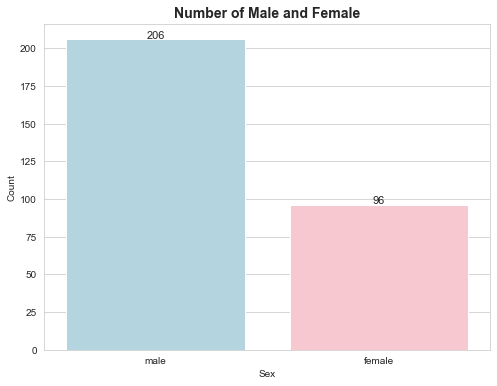

In [33]:
# Lets see how many male and female we have in our study
 
sex_countplot = plt.subplots(figsize = (8,6))
sex_countplot = sns.countplot(x= 'sex', data = cardio_factors, palette=['lightblue','pink'])
sex_countplot.set_title("Number of Male and Female", fontsize = 14, fontweight= 'bold')
sex_countplot.set_xlabel ("Sex")
sex_countplot.set_ylabel ("Count")
for rect in sex_countplot.patches:
    sex_countplot.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),
                        horizontalalignment='center', fontsize = 11)

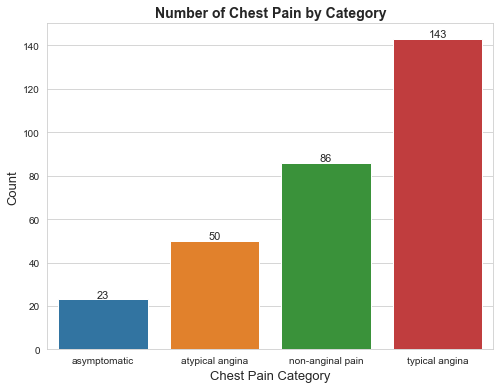

In [34]:
# Variable chest_pain

cp_countplot = plt.subplots(figsize = (8,6))
cp_countplot = sns.countplot(x= 'chest_pain_type', data = cardio_factors, 
                             order= cardio_factors['chest_pain_type'].value_counts().sort_values().index)
cp_countplot.set_title("Number of Chest Pain by Category", fontsize = 14, fontweight= 'bold')
cp_countplot.set_xlabel ("Chest Pain Category", fontsize = 13)
cp_countplot.set_ylabel ("Count", fontsize = 13)
for r in cp_countplot.patches:
    cp_countplot.text (r.get_x() + r.get_width()  / 2,r.get_height()+ 0.75,r.get_height(),
                        horizontalalignment='center', fontsize = 11)

Observation:

- We clear see that in a study of 302 people we found:
  
   The most common chest pain type is 'typical angina' with a 143 count, follow by 'non-anginal pain' with a count of 86, the type of chest pain: atypical angina recorded a number of 50, and finally the less ocurrence in chest pain type: asymptomatic has a count of 23.

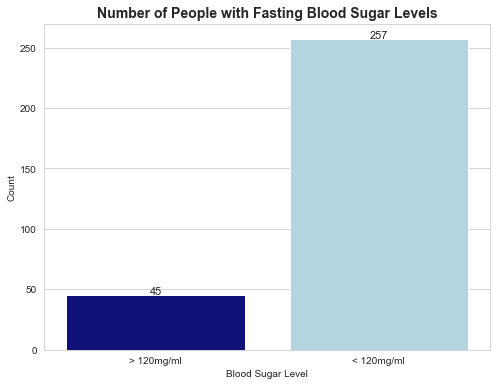

In [35]:
# Variable fasting_blood sugar
fbs_countplot = plt.subplots(figsize = (8,6))
fbs_countplot = sns.countplot(x= 'fasting_blood_sugar', data = cardio_factors, palette=['darkblue','lightblue'])
fbs_countplot.set_title("Number of People with Fasting Blood Sugar Levels", fontsize = 14, fontweight= 'bold')
fbs_countplot.set_xlabel ("Blood Sugar Level")
fbs_countplot.set_ylabel ("Count")
for f in fbs_countplot.patches:
    fbs_countplot.text (f.get_x() + rect.get_width()  / 2,f.get_height()+ 0.75,f.get_height(),
                        horizontalalignment='center', fontsize = 11)

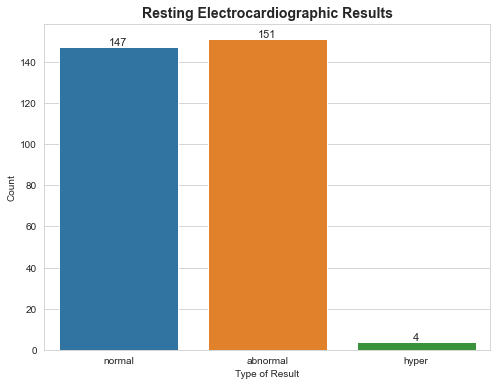

In [36]:
# Variable resting_electro
re_countplot = plt.subplots(figsize = (8,6))
re_countplot = sns.countplot(x= 'resting_electro', data = cardio_factors)
re_countplot.set_title("Resting Electrocardiographic Results", fontsize = 14, fontweight= 'bold')
re_countplot.set_xlabel ("Type of Result")
re_countplot.set_ylabel ("Count")
for re in re_countplot.patches:
    re_countplot.text (re.get_x() + re.get_width()  / 2,re.get_height()+ 0.75,re.get_height(),
                        horizontalalignment='center', fontsize = 11)

Observation:
Half of the people tested had a abnormal result with a count of 151 of a sample of 302 people.

## b) Study the occurrence of CVD (Cardiovascular Disease) across different ages

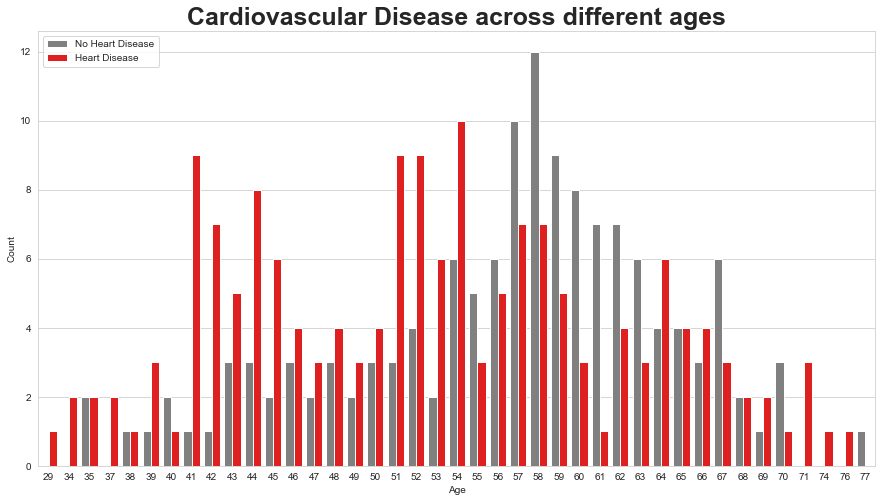

In [37]:
# Our Target Variable contains the values of 0 = No Heart Disease and 1 = Heart Disease
cardio_ages = plt.figure(figsize = (15,8))
cardio_ages = sns.countplot(x="age", hue="target", data= cardio_factors, palette=['grey','red'])
cardio_ages.set_title("Cardiovascular Disease across different ages", fontsize = 25, fontweight= 'bold')
cardio_ages.set_xlabel ("Age")
cardio_ages.set_ylabel ("Count")
plt.legend (['No Heart Disease', 'Heart Disease'], loc = 'upper left')


### c) Can we detect heart attack based on anomalies in resting blood pressure of the patient?

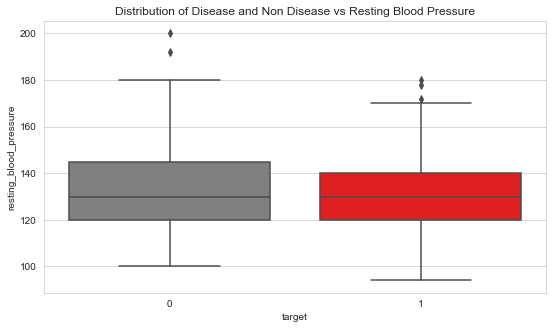

In [38]:
# Lets check our target variable against the resting_blood_pressure
resting_box = sns.boxplot(data = cardio_factors, x = 'target', y = 'resting_blood_pressure',
              palette =['grey','red']).set(title="Distribution of Disease and Non Disease vs Resting Blood Pressure")


### d) Study the composition of overall patients w.r.t . gender.

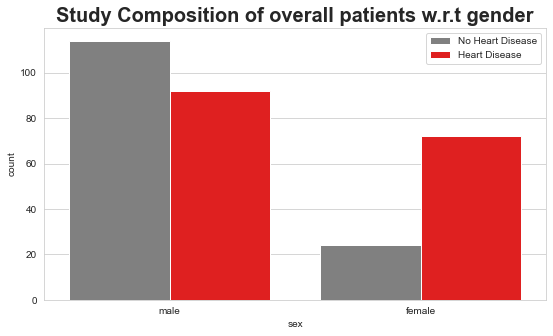

In [39]:
# Lets explore the target variable against the variable sex
gender_target = sns.countplot(x="sex", data=cardio_factors, hue = 'target', palette = ['grey','red'])
gender_target.set_title("Study Composition of overall patients w.r.t gender", fontsize = 20, fontweight= 'bold')
plt.legend (['No Heart Disease', 'Heart Disease'])

### e) Describe the relationship between cholesterol levels and our target variable.

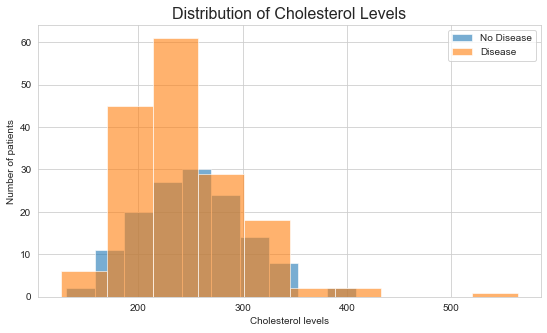

In [40]:
# Lets first take a look how is distributed
histogram_df = cardio_factors.groupby('target')
histogram_df['serum_cholesterol'].hist(bins = 10, alpha=0.6)
plt.title('Distribution of Cholesterol Levels', fontsize = 16)
plt.xlabel('Cholesterol levels')
plt.ylabel('Number of patients')
plt.legend(('No Disease', 'Disease'), loc = 'upper right')
plt.show()

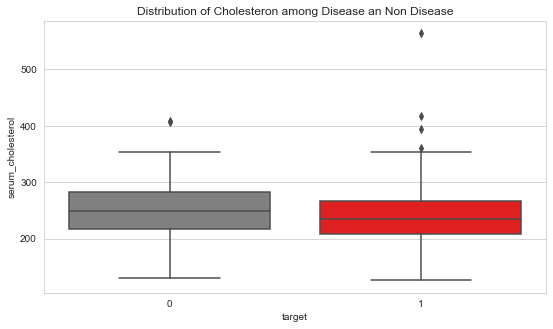

In [41]:
# Lets check the relationship
cholesterol_box = sns.boxplot(data = cardio_factors, x = 'target', y = 'serum_cholesterol',
              palette =['grey','red']).set(title="Distribution of Cholesteron among Disease an Non Disease")

### f) What can be concluded about the relationship between peak exercising and occurrence of heart attack?

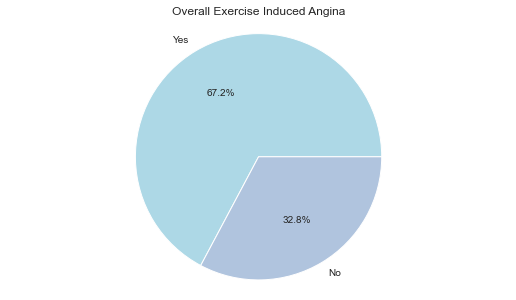

In [42]:
# Excercise induced angina is when you get chest disconfort with activity
# So, lets explore the variable excercise_induced_angina

my_data = cardio_factors.exercise_induced_angina.value_counts()
my_labels = 'Yes','No'
my_colors = ['lightblue','lightsteelblue']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', colors = my_colors)
plt.title('Overall Exercise Induced Angina')
plt.axis('equal')
plt.show()

We can see that there is 67.2% of people who exercise and experience disconfort with activity
Lets explore this variable with Disease and No Disease people

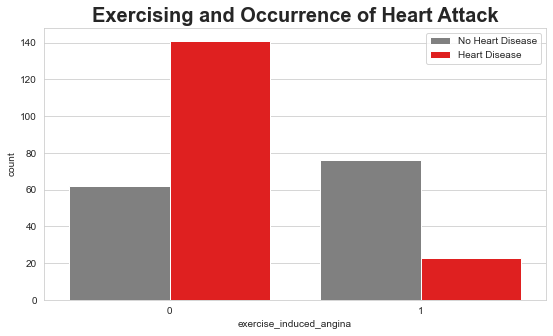

In [43]:
# Lets plot the data
angina_target = sns.countplot(x="exercise_induced_angina", data=cardio_factors, hue = 'target', palette = ['grey','red'])
angina_target.set_title("Exercising and Occurrence of Heart Attack", fontsize = 20, fontweight= 'bold')
plt.legend (['No Heart Disease', 'Heart Disease'])

We can see that the incidence of Heart Disease is higher with patients with no exercise induced angina

### g) Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?
Thalassemia is an inherited blood disorder characterized by the formation of abnormal form of hemoglobin. It causes tiredness, yellowish skin, dark urine, abdominal swelling and facial bone deformities.

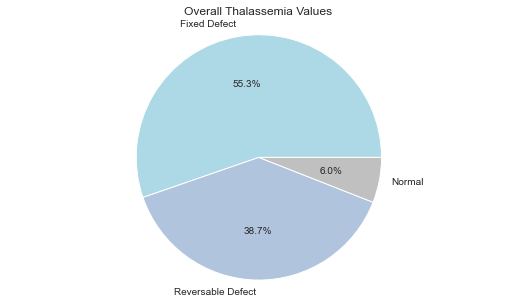

In [44]:
# lets check the Thalassemia distribution considered as fixed defect, reversable defect and normal in the population
thala_data = cardio_factors.thalassemia.value_counts()
thala_labels = 'Fixed Defect', 'Reversable Defect', 'Normal'
thala_colors = ['lightblue','lightsteelblue', 'silver']
plt.pie(thala_data,labels= thala_labels,autopct='%1.1f%%', colors = thala_colors)
plt.title('Overall Thalassemia Values')
plt.axis('equal')
plt.show()


There is a high percentage with Fixed Defect (55.3%) compared to a 38.7% of Reversable Defect and a small amount of 6% Normal

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

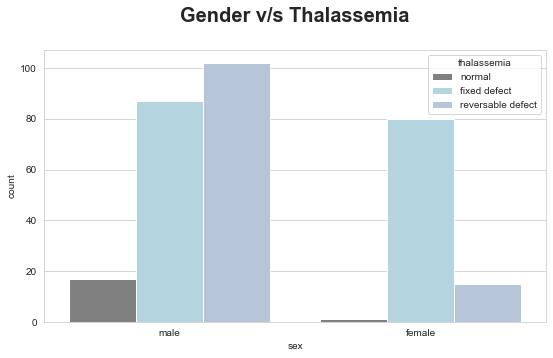

In [45]:
#Lets take a look comparing to Sex
thala_sex = sns.countplot(data= cardio_factors, x='sex',hue='thalassemia', palette = ['grey','lightblue', 'lightsteelblue'])
thala_sex.set_title('Gender v/s Thalassemia\n', fontsize = 20, fontweight = 'bold')

Text(0.5, 1.0, 'Heart Disease and No Heart Disease v/s Thalassemia\n')

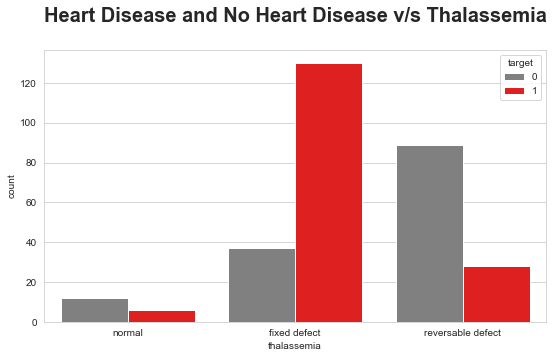

In [46]:
# Now lets compare thalassemia with our target variable
thala_sex = sns.countplot(data= cardio_factors, x='thalassemia',hue='target', palette = ['grey','red'])
thala_sex.set_title('Heart Disease and No Heart Disease v/s Thalassemia\n', fontsize = 20, fontweight = 'bold')

Observations:

- People with Thalassemia = fixed defect are the ones with higher incidence of Heart attack

- Males overall show more incidence with thalassemia

### Lets take a look at other factors like  fasting_blood_sugar, resting_electro

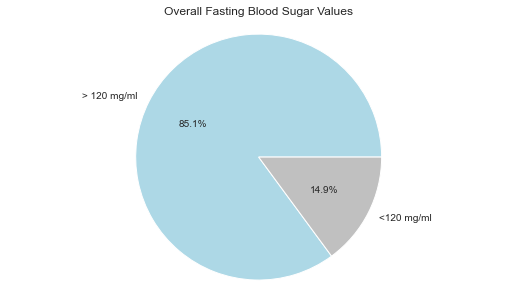

In [47]:
# Fasting blood sugar
fast_data = cardio_factors.fasting_blood_sugar.value_counts()
fast_labels = '> 120 mg/ml', '<120 mg/ml'
fast_colors = ['lightblue', 'silver']
plt.pie(fast_data,labels= fast_labels,autopct='%1.1f%%', colors = fast_colors)
plt.title('Overall Fasting Blood Sugar Values')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Heart Disease and No Heart Disease vs Fasting Blood Sugar\n')

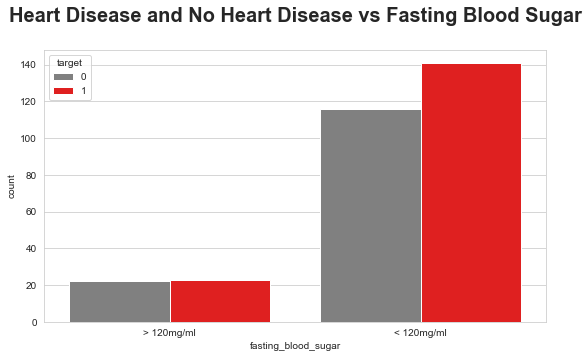

In [48]:
# Heart Disease vs Fasting blood sugar
# Now lets compare fasting_blood_sugar with our target variable
fast_target= sns.countplot(data= cardio_factors, x='fasting_blood_sugar',hue='target', palette = ['grey','red'])
fast_target.set_title('Heart Disease and No Heart Disease vs Fasting Blood Sugar\n', fontsize = 20, fontweight = 'bold')

Eventhough there is more incidence of fasting_blood_sugar with higher levels of >120 mg/m, it is definitely a huge difference in Heart Disease and No Heart Disease when the values of fasting blood sugar are lower than 120 mg/ml

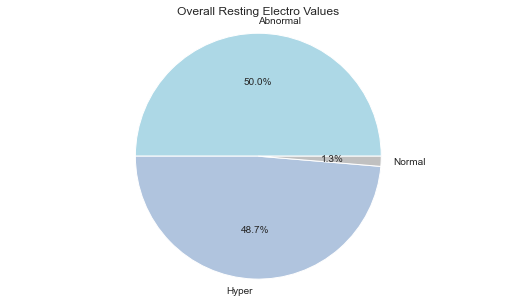

In [49]:
# resting_electro
resting_data = cardio_factors.resting_electro.value_counts()
resting_labels = 'Abnormal', 'Hyper', 'Normal'
resting_colors = ['lightblue','lightsteelblue','silver']
plt.pie(resting_data,labels= resting_labels,autopct='%1.1f%%', colors = resting_colors)
plt.title('Overall Resting Electro Values')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Heart Disease and No Heart Disease v/s Resting Electro\n')

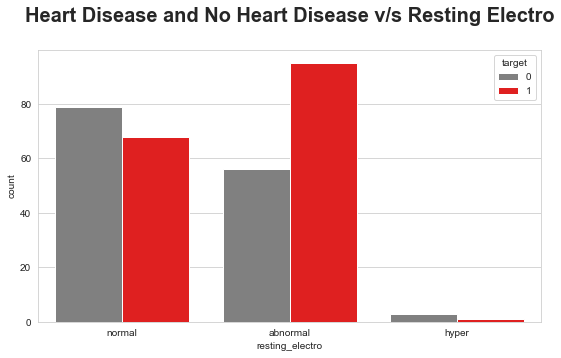

In [50]:
# Now lets compare resting_electro with our target variable
resting_target = sns.countplot(data= cardio_factors, x='resting_electro',hue='target', palette = ['grey','red'])
resting_target.set_title('Heart Disease and No Heart Disease v/s Resting Electro\n', fontsize = 20, fontweight = 'bold')

Values show a higher number of Heart Disease in abnormal resting_electro

### h) Use a pair plot to understand the relationship between all the given variables.
Lets visualize the cardio_factors data to find the relationship between the continuous or categorical variables.

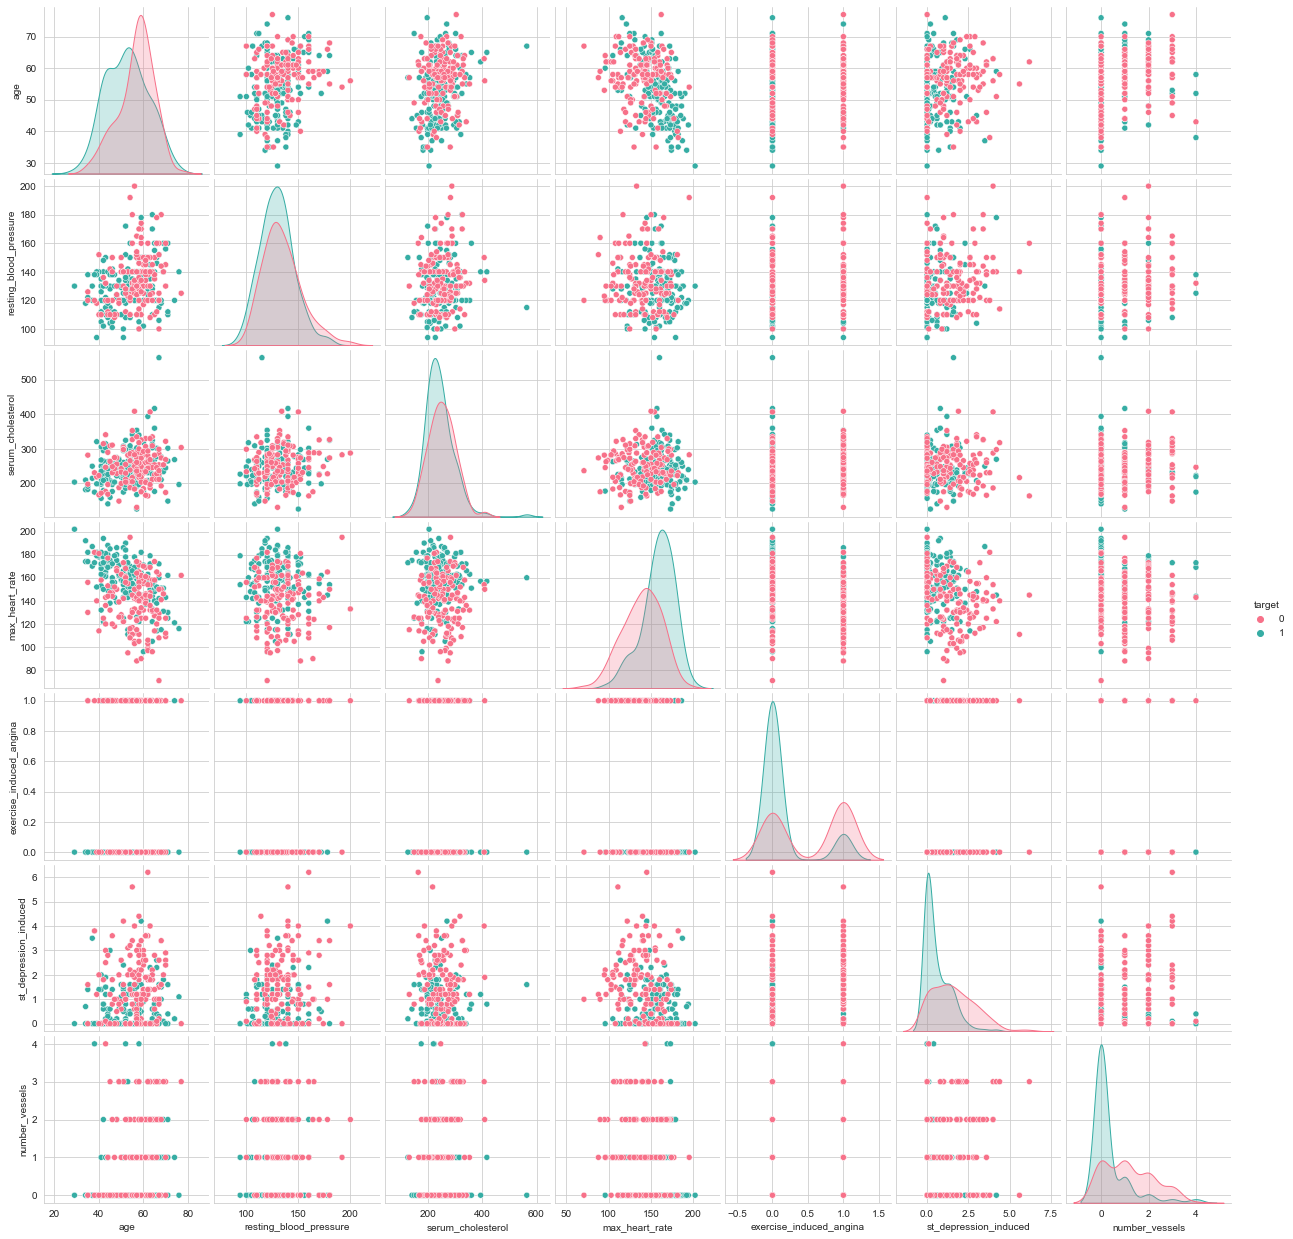

In [52]:
pair_target = sns.pairplot( data = cardio_factors, hue = 'target', palette = 'husl')


### i) Perform Logistic Regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [51]:
data = pd.get_dummies(cardio_factors)
data.columns = data.columns.str.replace(' ', '_')

In [52]:
train, test = split(data, test_size = .30, random_state = 12)
train.shape

(211, 25)

In [53]:
train.head()

,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,exercise_induced_angina,st_depression_induced,number_vessels,target,sex_female,sex_male,...,fasting_blood_sugar_>_120mg/ml,resting_electro_abnormal,resting_electro_hyper,resting_electro_normal,slope_downsloping,slope_flat,slope_upsloping,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
137,62,128,208,140,0,0.0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
232,55,160,289,145,1,0.8,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
68,44,120,220,170,0,0.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
142,42,120,209,173,0,0.0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
149,42,130,180,150,0,0.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [54]:
X_train = train.drop ('target', axis = 1)
Y_train = train.target


In [55]:
X_test = test.drop('target', axis = 1)
Y_test = test.target

In [56]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
lr.fit(X_train, Y_train)

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
pred = lr.predict(X_test)

accuracy_score (y_true = Y_test, y_pred = pred)
print(classification_report(y_true = Y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        45
           1       0.86      0.80      0.83        46

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



The classification report of the model shows that 86% prediction of absence of heart disease was predicted correct and 81% of presence of heart disease was predicted correct.

In [61]:
# Looking at the confusion matrix
print(confusion_matrix(Y_test, pred))

[[39  6]
 [ 9 37]]


The Confusion Matrix True Positive value is 39 and true Negative was 37. The False Positive came out to be 6 and False Negative is 9.